In [1]:
# import required dependencies

import pandas as pd # to work with dataframes
import numpy as np # to work with arrays

import matplotlib.pyplot as plt # to plot our data
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor # import Decision Tree Classifier

from sklearn.metrics import accuracy_score, mean_squared_error # to check accuracy of our model

import math

In [2]:
data = pd.read_csv("E:/DAB 4A/DAB 403 SM/Class 11/norway_new_car_sales_by_make.csv")
data['Period'] = data['Year'].astype(str) + '-' + data['Month'].astype(str).str.zfill(2)
df = pd.pivot_table(data = data , values = 'Quantity' , index = 'Make' , columns = 'Period' , aggfunc = 'sum' , fill_value = 0)
df

Period,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01
Make,,,,,,,,,,,,,,,,,,,,,
Alfa Romeo,16,9,21,20,17,21,14,12,15,10,...,3,1,2,1,6,15,3,4,3,6
Aston Martin,0,0,1,0,4,3,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Audi,599,498,682,556,630,498,562,590,393,554,...,685,540,551,687,794,688,603,645,827,565
BMW,352,335,365,360,431,477,403,348,271,562,...,1052,832,808,636,1031,1193,1096,1663,866,1540
Bentley,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Think,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Toyota,2884,1885,1833,1300,1866,1620,1901,1783,1303,1648,...,1432,1687,1603,1127,1824,1823,1327,1375,1238,1526
Volkswagen,2521,1517,1428,1257,1934,1531,1777,1665,1373,1941,...,3017,2222,2287,2076,2359,2084,2161,2106,2239,1688


In [3]:
def datasets(df, x_len = 12, y_len = 1, test_loops = 12):
    D = df.values
    rows, periods = D.shape
    
    loops = periods + 1 - x_len - y_len
    train = []
    
    for col in range(loops):
        train.append(D[:,col:col + x_len + y_len])
    train = np.vstack(train)
    X_train, Y_train = np.split(train,[-y_len], axis = 1)
    
    if test_loops > 0:
        X_train, X_test = np.split(X_train, [-rows * test_loops], axis = 0)
        Y_train, Y_test = np.split(Y_train, [-rows * test_loops], axis = 0)
    else:
        X_test = D[:, -x_len:]
        Y_test = np.full((X_test.shape[0], y_len), np.nan)
        
    if y_len == 1:
        Y_train = Y_train.ravel()
        Y_test = Y_test.ravel()
        
    return X_train, Y_train, X_test, Y_test

In [4]:
X_train, Y_train, X_test, Y_test = datasets(df, x_len = 12, y_len = 1, test_loops = 12)

In [5]:
X_train.shape

(6305, 12)

In [6]:
Y_train.shape

(6305,)

In [7]:
X_test.shape

(780, 12)

In [8]:
Y_test.shape

(780,)

In [9]:
dtree = DecisionTreeRegressor(max_depth = 5)
dtree_model = dtree.fit(X_train,Y_train)

In [10]:
dtree_model

DecisionTreeRegressor(max_depth=5)

In [11]:
dtree_pred = dtree_model.predict(X_test)

In [12]:
dtree_acc = mean_squared_error(Y_test, dtree_pred)
dtree_acc

12271.474737025834

In [13]:
from sklearn.tree import plot_tree

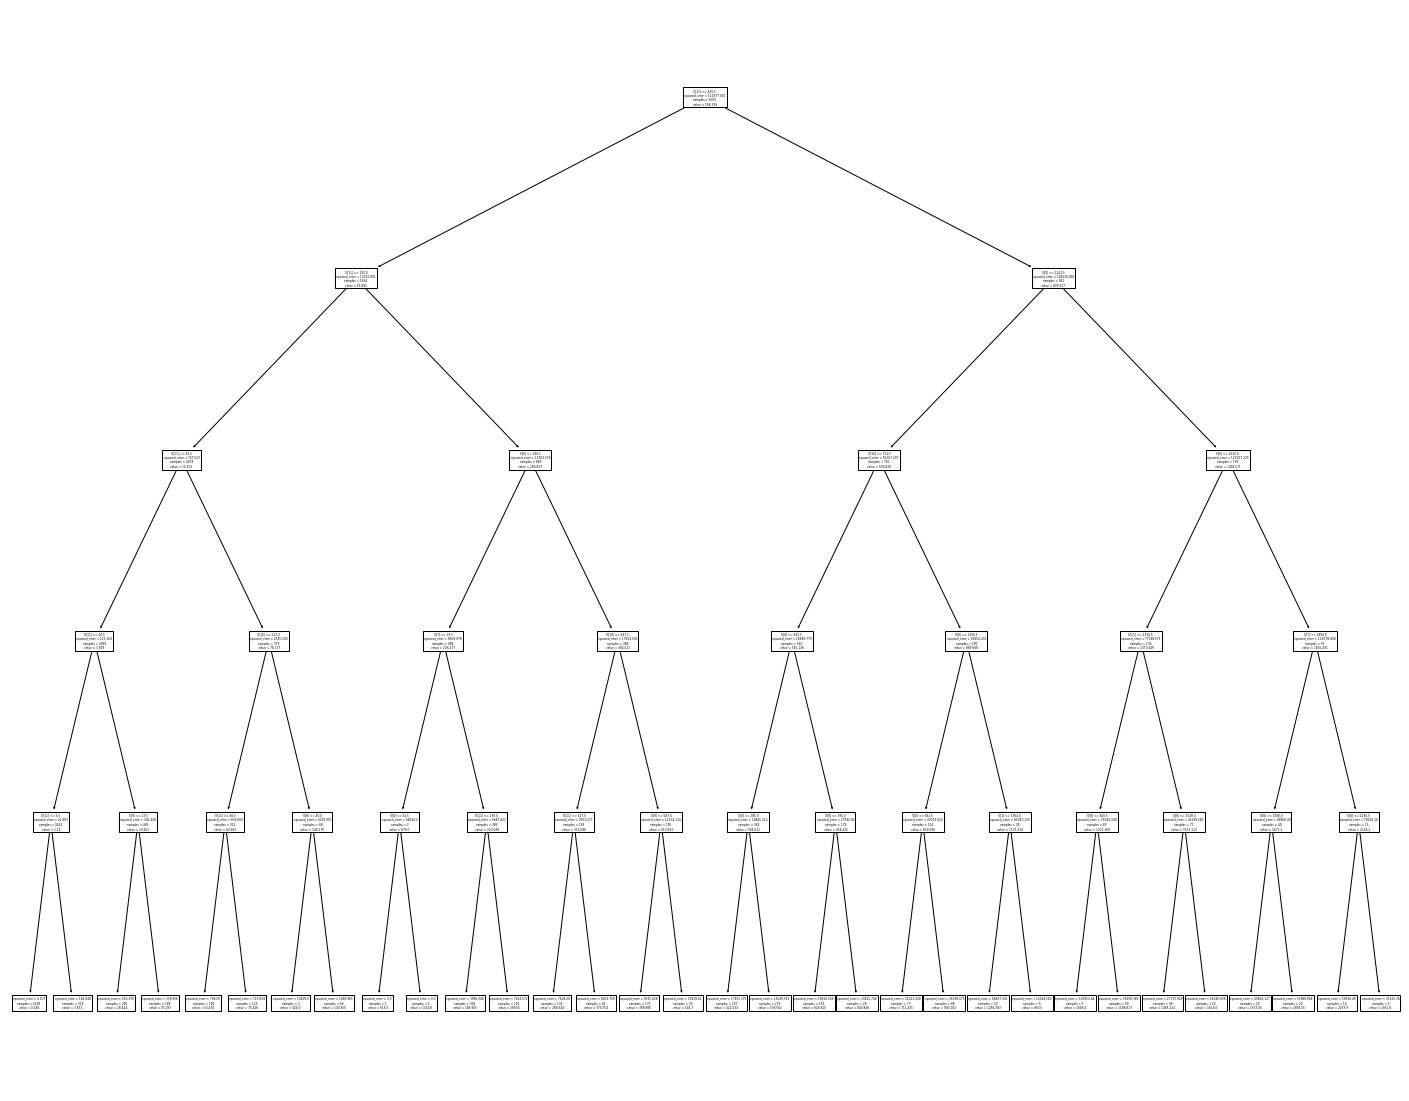

In [14]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree_model)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rfr = RandomForestRegressor(bootstrap = True, max_depth = 5, max_features = 5, criterion = 'mse')

In [17]:
rfr_model = rfr.fit(X_train,Y_train)

C:\Users\W0776802\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [18]:
rfr_pred = rfr_model.predict(X_test)

In [19]:
rfr_acc = mean_squared_error(Y_test,rfr_pred)
rfr_acc

8238.684683740401